In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
path = "C:/Users/User/OpenCv/misc/"
img1path = path + "4.2.06.tiff"
img2path = path + "lena_color_512.tif"

img1 = cv2.imread(img1path, 1)
img2 = cv2.imread(img2path, 1)

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

## 1) Blending Effect

In [3]:
alpha = 0.7
beta = 0.3
gamma = 0
img3 = cv2.addWeighted(img1, alpha, img2, beta, gamma)
img4 = img1 + img2

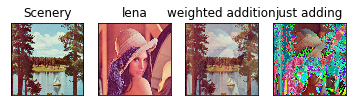

In [4]:
titles = ["Scenery", "lena", "weighted addition", "just adding"]
images = [img1, img2, img3, img4]
for i in range(len(images)):
    plt.subplot(1, len(images), i + 1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

## 2) Transitioning effect

In [5]:
i = 0.0
while(i < 1):
    alpha = i
    beta = 1.0 - alpha
    output = cv2.addWeighted(img1, alpha, img2, beta, 0)
    cv2.imshow("Transition", output)
    time.sleep(0.02)
    if(cv2.waitKey(1) == 27):
        break
    i += 0.01
cv2.destroyAllWindows()

## 3) Trackbar Image Blending App

In [6]:
output = cv2.addWeighted(img1, 0.5, img2, 0.5, 0)
windowName = "Transition Demo"
cv2.namedWindow(windowName)

In [7]:
def emptyFunction():
    pass
cv2.createTrackbar("Alpha", windowName, 0, 100, emptyFunction)

In [8]:
while(1):
    cv2.imshow(windowName, output)
    if(cv2.waitKey(1) == 27):
        break
    alpha = cv2.getTrackbarPos("Alpha", windowName) / 100
    beta = 1 - alpha
    output = cv2.addWeighted(img1, alpha, img2, beta, 0)
cv2.destroyAllWindows()